In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
df = pd.read_csv("cropyield.csv")

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Drop invalid or missing crop yield
df = df[df['Crop_Yield'] > 0.2]

In [4]:
# Convert date and sort
# Ensure 'Date' column exists and convert to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date']) 
df = df.sort_values('Date').drop_duplicates()
# Sort and set Date as index
df.set_index('Date', inplace=True)
# Drop invalid or missing crop yield
df = df[df['Crop_Yield'] > 0.2]

# Identify categorical columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
# Label Encoding for ordinal or low-cardinality categorical columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))

# Resample and interpolate numeric columns
df = df.resample('D').mean()
df = df.interpolate('time').reset_index()

# Display sample
print("✅ Data ready after encoding and resampling:")
print(df.head())
print("Columns:", df.columns.tolist())


✅ Data ready after encoding and resampling:
        Date  Crop_Type  Soil_Type   Soil_pH  Temperature   Humidity  \
0 2014-01-01   3.714286   2.000000  6.250000    17.832341  79.992489   
1 2014-01-02   4.285714   1.714286  6.928571    17.403738  79.997477   
2 2014-01-03   3.714286   2.000000  6.250000    17.710699  78.611669   
3 2014-01-04   4.500000   2.500000  7.125000    17.068594  79.349411   
4 2014-01-05   3.750000   1.625000  6.375000    15.439732  80.000000   

   Wind_Speed          N          P          K  Crop_Yield  Soil_Quality  
0    7.649061  61.285714  50.142857  40.142857   52.962570     41.714286  
1    9.731096  67.285714  54.500000  43.785714   49.481053     31.964286  
2   12.161914  60.785714  49.571429  40.142857   31.582386     40.601190  
3    9.476664  69.375000  56.000000  44.937500   35.247034     38.703125  
4   10.793227  68.062500  54.562500  43.125000   32.578187     48.994792  
Columns: ['Date', 'Crop_Type', 'Soil_Type', 'Soil_pH', 'Temperature', 'Hu

In [5]:
df

,Date,Crop_Type,Soil_Type,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality
0,2014-01-01,3.714286,2.000000,6.250000,17.832341,79.992489,7.649061,61.285714,50.142857,40.142857,52.962570,41.714286
1,2014-01-02,4.285714,1.714286,6.928571,17.403738,79.997477,9.731096,67.285714,54.500000,43.785714,49.481053,31.964286
2,2014-01-03,3.714286,2.000000,6.250000,17.710699,78.611669,12.161914,60.785714,49.571429,40.142857,31.582386,40.601190
3,2014-01-04,4.500000,2.500000,7.125000,17.068594,79.349411,9.476664,69.375000,56.000000,44.937500,35.247034,38.703125
4,2014-01-05,3.750000,1.625000,6.375000,15.439732,80.000000,10.793227,68.062500,54.562500,43.125000,32.578187,48.994792
...,...,...,...,...,...,...,...,...,...,...,...,...
3647,2023-12-27,4.125000,2.375000,6.406250,18.765488,79.418663,10.391741,63.687500,51.937500,41.125000,45.000561,27.786458
3648,2023-12-28,4.500000,1.833333,6.583333,15.818711,79.517023,11.417404,66.000000,54.166667,42.833333,36.566595,41.680556
3649,2023-12-29,4.500000,1.875000,6.843750,17.750068,79.094460,9.926405,66.062500,53.687500,42.375000,42.949637,39.281250
3650,2023-12-30,4.555556,2.444444,6.555556,15.174002,79.253593,8.844230,64.666667,51.944444,41.388889,26.585890,33.787037


In [6]:
# ARIMA MODEL
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

y = df.set_index('Date')['Crop_Yield']

# Train-test split
split = int(len(y) * 0.8)
y_train, y_test = y[:split], y[split:]

In [7]:
# Fit ARIMA
model = ARIMA(y_train, order=(1,1,1))
results = model.fit()

# Forecast
ari_for = results.forecast(steps=len(y_test))

# Evaluate
mae = mean_absolute_error(y_test, ari_for)
rmse = np.sqrt(mean_squared_error(y_test, ari_for))
r2 = r2_score(y_test, ari_for)

print(f"ARIMA → MAE: {mae:.3f}, RMSE: {rmse:.3f}, R²: {r2:.3f}")

C:\Users\abida\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\abida\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\abida\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA → MAE: 10.322, RMSE: 12.615, R²: -0.087


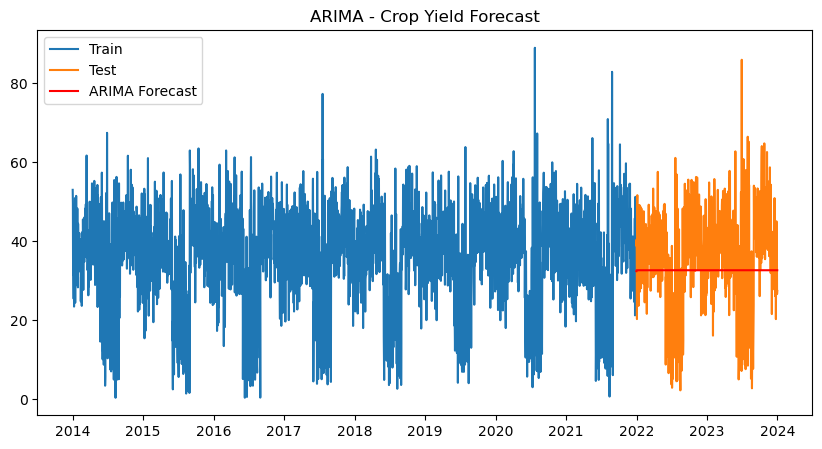

In [8]:
plt.figure(figsize=(10,5))
plt.plot(y_train, label="Train")
plt.plot(y_test, label="Test")
plt.plot(y_test.index, ari_for, color='red', label="ARIMA Forecast")
plt.title("ARIMA - Crop Yield Forecast")
plt.legend()
plt.show()

In [9]:
# ARIMAX MODEL
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Define regressors
features = ['Temperature','Humidity','Wind_Speed','Soil_pH','N','P','K','Soil_Quality']
X = df[features]
y = df['Crop_Yield']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
split = int(len(X) * 0.8)
X_train, X_test = X_scaled[:split], X_scaled[split:]
y_train, y_test = y[:split], y[split:]


In [10]:
# --- AUTO ARIMA for optimal parameters ---
from pmdarima import auto_arima

auto_model = auto_arima(
    y_train, exogenous=X_train, seasonal=False,
    stepwise=True, suppress_warnings=True, trace=True
)

best_order = auto_model.order
print(f"Best ARIMA Order Found: {best_order}")

# --- Fit SARIMAX (ARIMAX) with best parameters ---
model = SARIMAX(y_train, exog=X_train, order=best_order)
results = model.fit(disp=False)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=21762.955, Time=0.45 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=29486.548, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=23201.482, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=27109.256, Time=0.19 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=21762.495, Time=0.23 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=25797.686, Time=0.28 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=21759.219, Time=0.25 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=21760.325, Time=0.21 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=22490.264, Time=0.10 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=21726.445, Time=1.38 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=22477.452, Time=0.37 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=22279.964, Time=0.19 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=21728.280, Time=1.85 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=21728.274, Time=1.59 sec
 ARIMA(0,0,0)(0,0,0

C:\Users\abida\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [11]:
# --- Forecast ---
arix_for = results.forecast(steps=len(X_test), exog=X_test)

In [12]:
# --- Evaluate ---
mae = mean_absolute_error(y_test, arix_for)
rmse = np.sqrt(mean_squared_error(y_test, arix_for))
r2 = r2_score(y_test, arix_for)
print(f"ARIMAX → MAE: {mae:.3f}, RMSE: {rmse:.3f}, R²: {r2:.3f}")

ARIMAX → MAE: 4.675, RMSE: 6.158, R²: 0.741


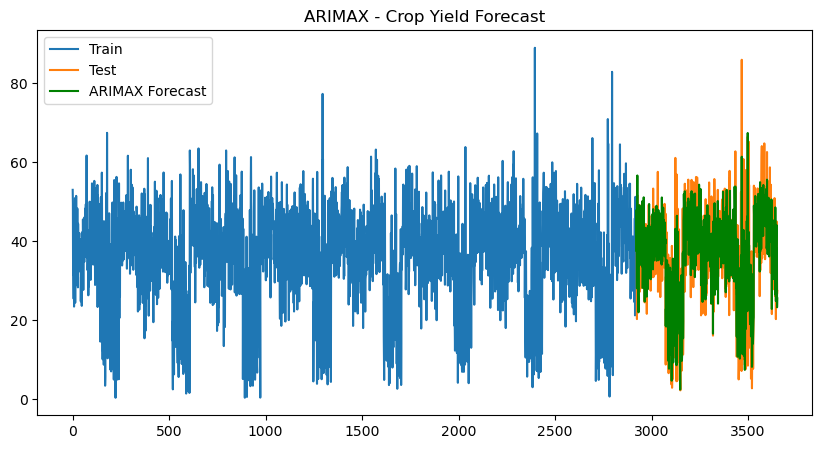

In [13]:
plt.figure(figsize=(10,5))
plt.plot(y_train.index, y_train, label="Train")
plt.plot(y_test.index, y_test, label="Test")
plt.plot(y_test.index, arix_for, color='green', label="ARIMAX Forecast")
plt.title("ARIMAX - Crop Yield Forecast")
plt.legend()
plt.show()

In [14]:
# PROPHET MODEL

from prophet import Prophet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Prepare Prophet dataset
df_prophet = df.rename(columns={'Date': 'ds', 'Crop_Yield': 'y'})
regressors = ['Temperature','Humidity','Wind_Speed','Soil_pH','N','P','K','Soil_Quality']

# Scale regressors
scaler = StandardScaler()
df_prophet[regressors] = scaler.fit_transform(df_prophet[regressors])

# Split into train/test
split = int(len(df_prophet) * 0.8)
train = df_prophet[:split]
test = df_prophet[split:]

In [15]:
# Initialize Prophet and add regressors
model = Prophet()
for reg in regressors:
    model.add_regressor(reg)

# Fit model
model.fit(train)

# Prepare future DataFrame
future = test[['ds'] + regressors]

00:05:56 - cmdstanpy - INFO - Chain [1] start processing
00:05:56 - cmdstanpy - INFO - Chain [1] done processing


In [16]:
# Predict
pro_for = model.predict(future)

# Evaluate
mae = mean_absolute_error(test['y'], pro_for['yhat'])
rmse = np.sqrt(mean_squared_error(test['y'], pro_for['yhat']))
r2 = r2_score(test['y'], pro_for['yhat'])
print(f"PROPHET → MAE: {mae:.3f}, RMSE: {rmse:.3f}, R²: {r2:.3f}")

PROPHET → MAE: 4.718, RMSE: 6.183, R²: 0.739


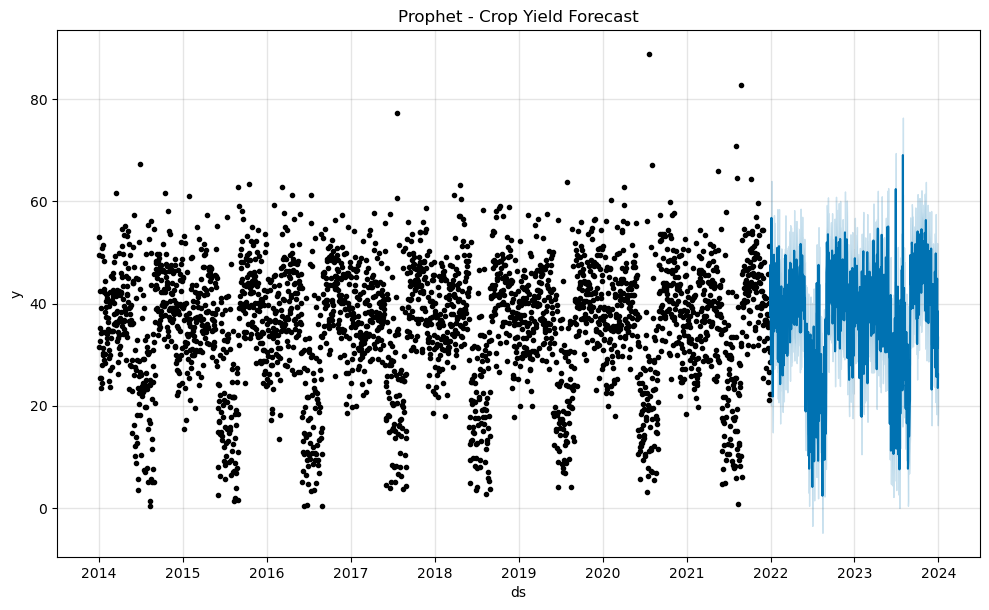

In [17]:
# Plot
fig = model.plot(pro_for)
plt.title("Prophet - Crop Yield Forecast")
plt.show()


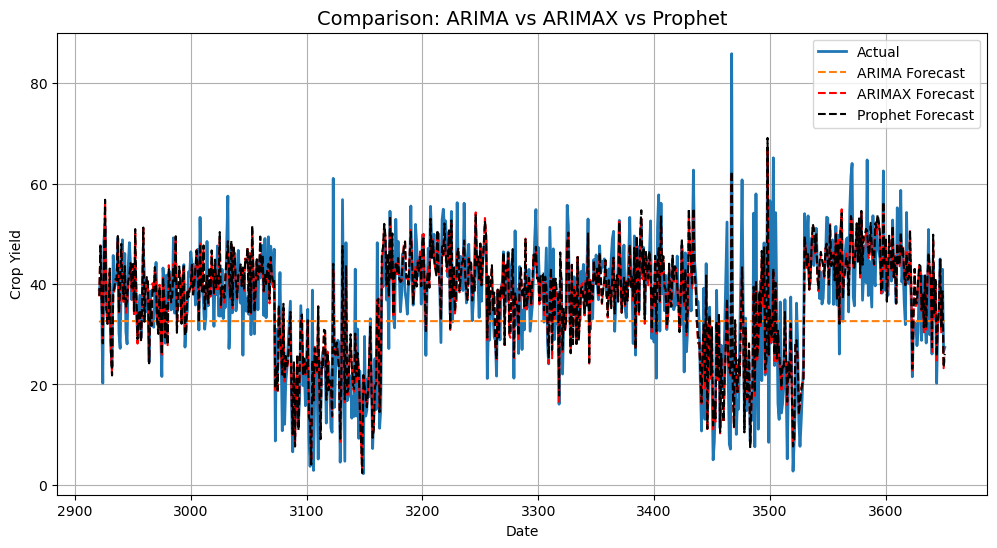

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure all forecasts align by index
comparison_df = pd.DataFrame({
    'Actual': y_test.values[:len(y_test)],
    'ARIMA': ari_for.values[:len(y_test)],
    'ARIMAX': arix_for.values[:len(y_test)],
    'PROPHET': pro_for['yhat'].values[:len(y_test)]
}, index=y_test.index[:len(y_test)])

plt.figure(figsize=(12,6))
plt.plot(comparison_df.index, comparison_df['Actual'], label='Actual', linewidth=2)
plt.plot(comparison_df.index, comparison_df['ARIMA'], label='ARIMA Forecast', linestyle='--')
plt.plot(comparison_df.index, comparison_df['ARIMAX'], label='ARIMAX Forecast', linestyle='--',color = 'red')
plt.plot(comparison_df.index, comparison_df['PROPHET'], label='Prophet Forecast', linestyle='--',color = 'k')
plt.title("Comparison: ARIMA vs ARIMAX vs Prophet", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Crop Yield")
plt.legend()
plt.grid(True)
plt.show()


In [19]:
import joblib

joblib.dump(model, "prophet_model.pkl")

print("Prophet model saved as prophet_model.pkl successfully!")


Prophet model saved as prophet_model.pkl successfully!


In [24]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# --- Convert all to numeric Pandas Series ---
y_test = pd.Series(y_test).astype(float).reset_index(drop=True)
ari_for = pd.Series(ari_for).astype(float).reset_index(drop=True)
arix_for = pd.Series(arix_for).astype(float).reset_index(drop=True)
pro_for = pd.Series(pro_for).astype(float).reset_index(drop=True)

# --- Align lengths (important for Prophet / ARIMA differences) ---
min_len = min(len(y_test), len(ari_for), len(arix_for), len(pro_for))
y_test = y_test.iloc[:min_len]
ari_for = ari_for.iloc[:min_len]
arix_for = arix_for.iloc[:min_len]
pro_for = pro_for.iloc[:min_len]

# --- Compute metrics ---
results = {
    'ARIMA': {
        'MAE': mean_absolute_error(y_test, ari_for),
        'RMSE': np.sqrt(mean_squared_error(y_test, ari_for)),
        'R2': r2_score(y_test, ari_for)
    },
    'ARIMAX': {
        'MAE': mean_absolute_error(y_test, arix_for),
        'RMSE': np.sqrt(mean_squared_error(y_test, arix_for)),
        'R2': r2_score(y_test, arix_for)
    },
    'Prophet': {
        'MAE': mean_absolute_error(y_test, pro_for),
        'RMSE': np.sqrt(mean_squared_error(y_test, pro_for)),
        'R2': r2_score(y_test, pro_for)
    }
}

comparison_table = pd.DataFrame(results).T
print("\n📊 Model Performance Comparison:\n")
print(comparison_table)


ValueError: 2